# Problem statement - Heart Disease Prediction

# Analytic approach - Binary class classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv("D:/Imarticus/Datasets/HeartDisease.csv")

In [5]:
df.sample(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0


In [6]:
df.shape

(303, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

## Data cleaning

In [10]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [11]:
for i in df.columns:
    print(i,' - ',df[i].unique())

age  -  [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
gender  -  [1 0]
chest_pain  -  [3 2 1 0]
rest_bps  -  [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholestrol  -  [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311

In [12]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [13]:
cols = ['gender', 'chest_pain','rest_ecg','fasting_blood_sugar','exer_angina','slope', 'ca', 'thalassemia']

for i in cols:
    df[i] = df[i].astype(str) 

In [15]:
df.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

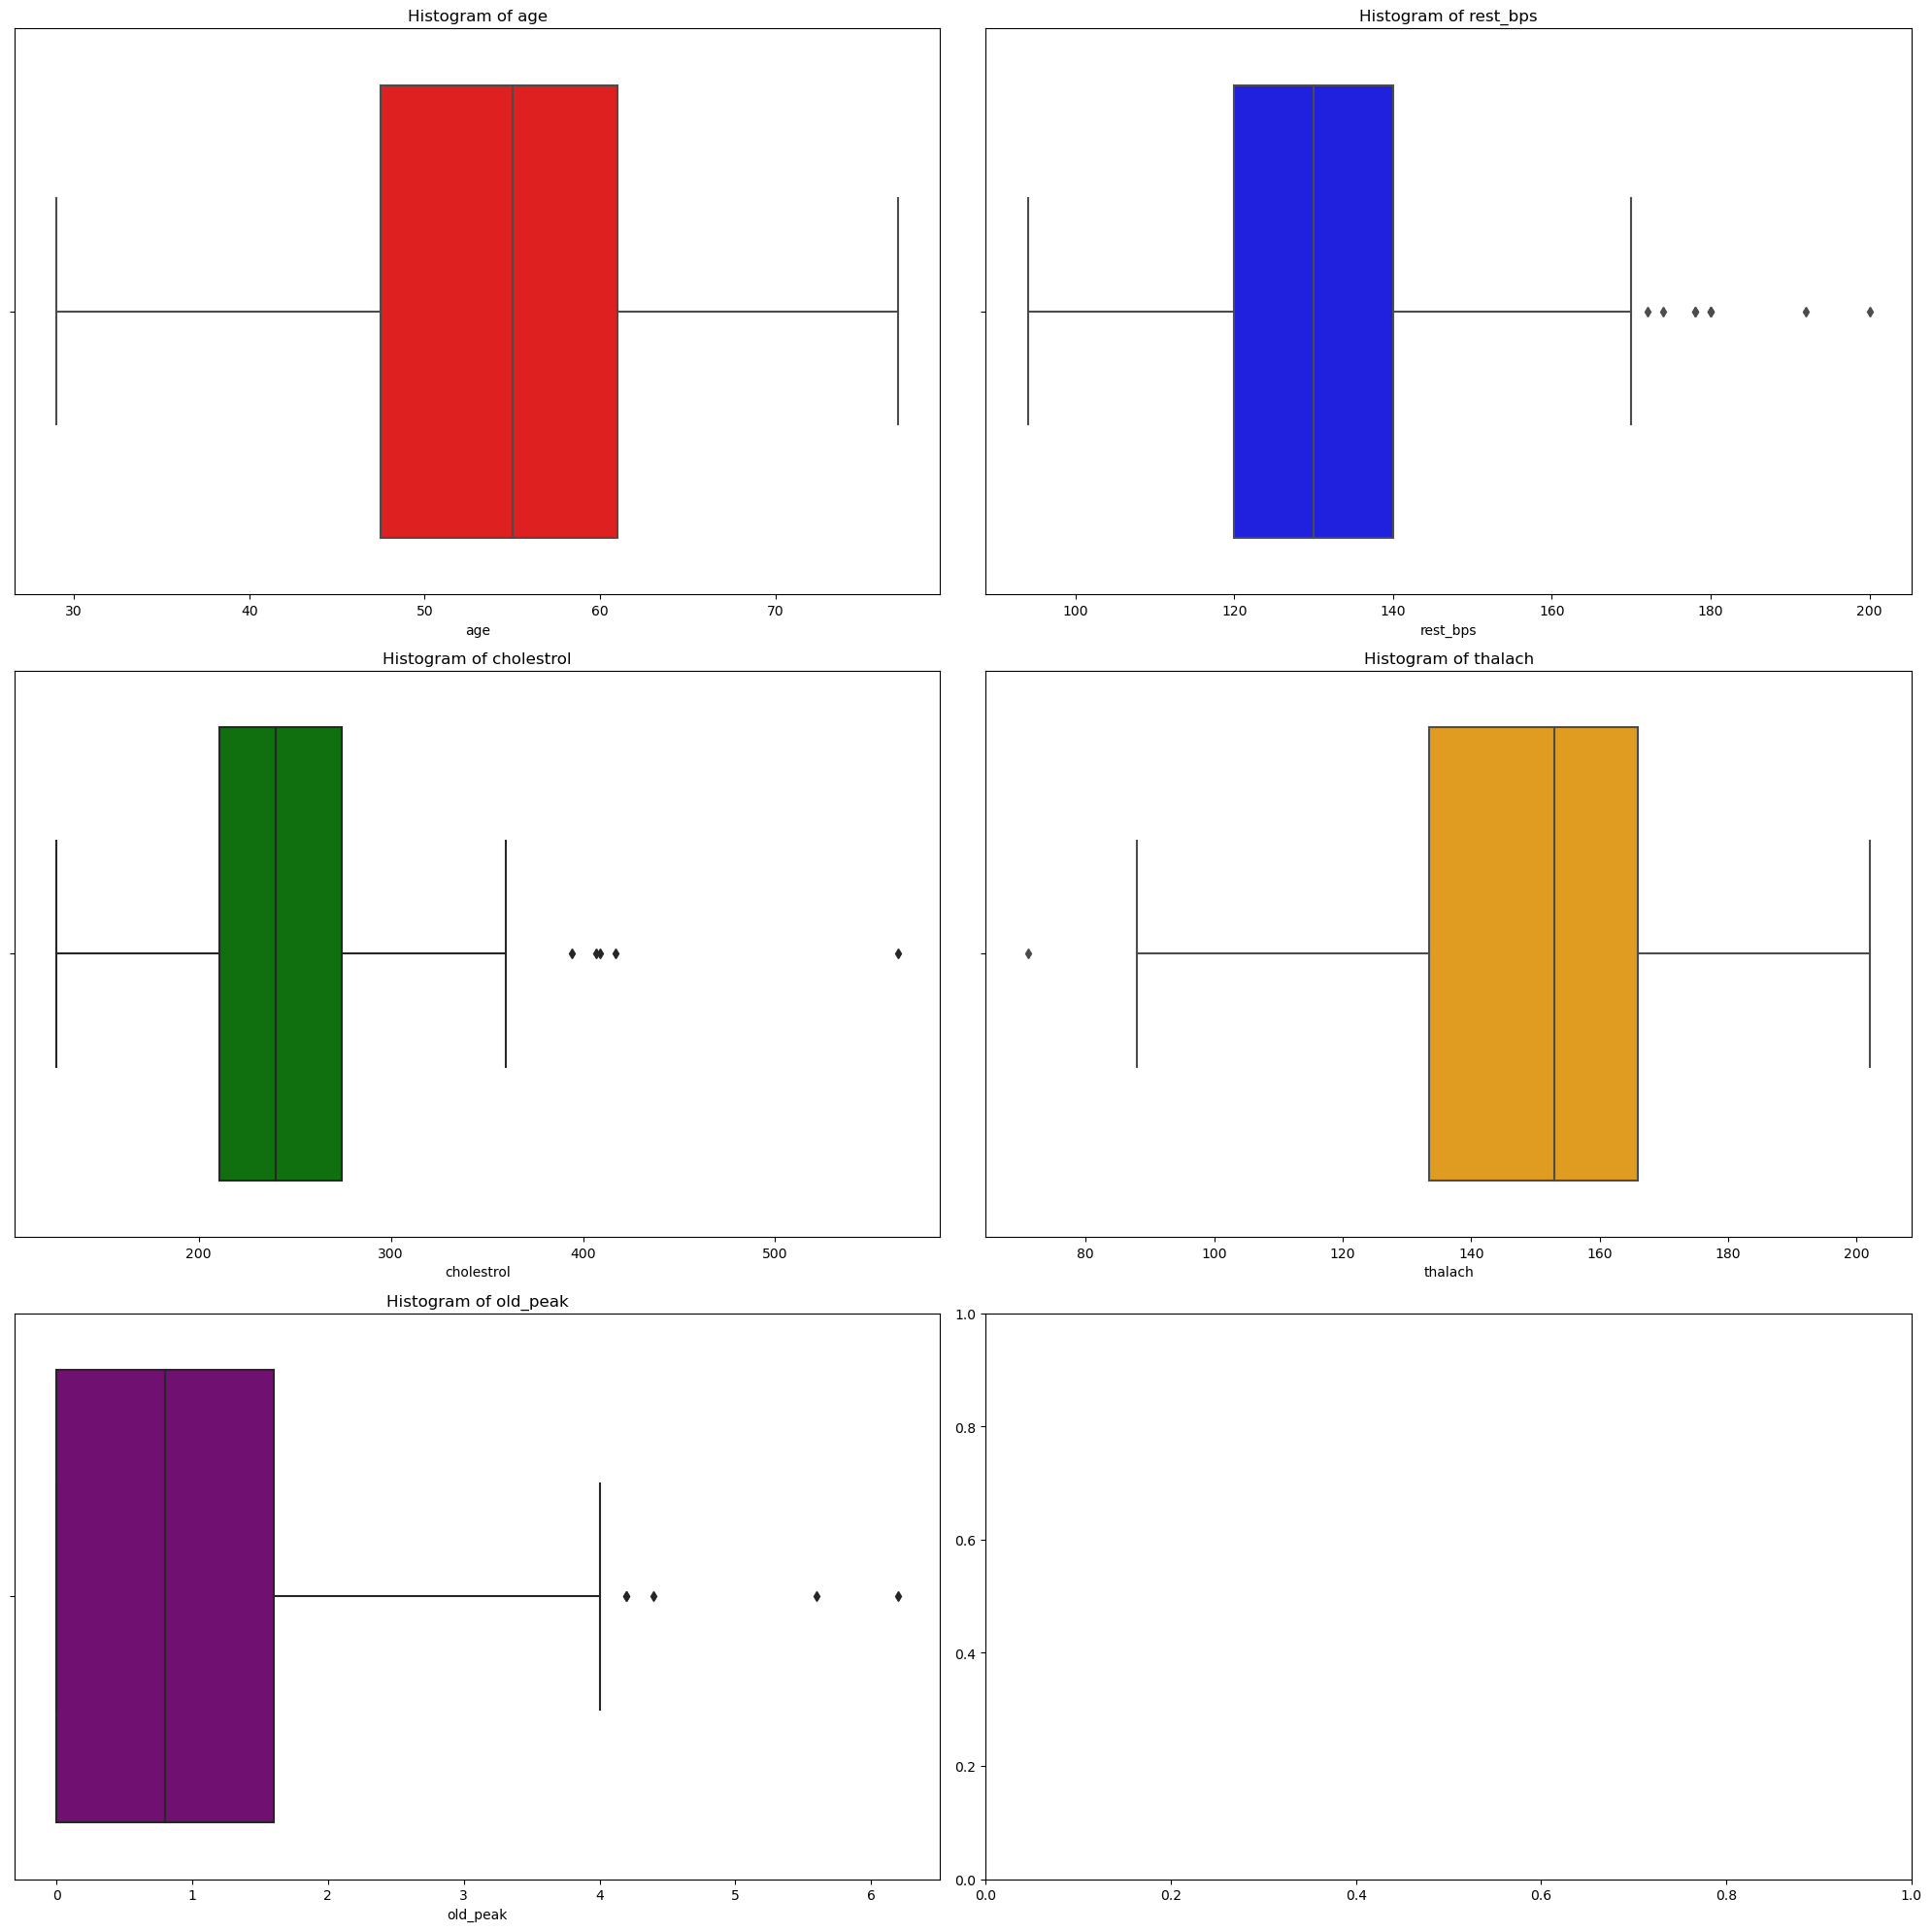

In [40]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'indigo', 'pink']
x = df.drop('target',axis=1)
x=x.select_dtypes(exclude='object')
num_cols = len(x.columns)
num_rows = (num_cols + 1) // 2  

fig, axes = plt.subplots(num_rows, 2, figsize=(20,20))

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(x.columns):
    row = i // 2  
    col = i % 2   
    sns.boxplot(x= x[column], ax=axes[row][col], color=colors[i % len(colors)])
    axes[row][col].set_title(f'Histogram of {column}')
    ax.set_title(column, fontsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

plt.tight_layout()
plt.show()

## Data visualization

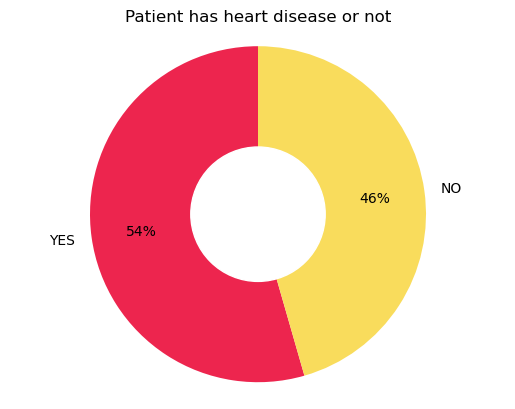

In [25]:
freq = df['target'].value_counts()
counts = freq.to_list()
keys = freq.keys().to_list()
labels = {0: 'NO', 1: 'YES'}  # Custom labels mapping

# Map keys to labels
keys_mapped = [labels.get(key) for key in keys]

colors = ["#ed254e","#f9dc5c"]

plt.pie(x=counts,labels = keys_mapped,colors=colors,autopct='%1.0f%%',startangle=90, pctdistance=0.70)

circle = plt.Circle(xy=(0,0),radius=0.4,color='white')
plt.gcf()
plt.gca().add_artist(circle)

plt.axis('equal')
plt.title("Patient has heart disease or not")
plt.show()

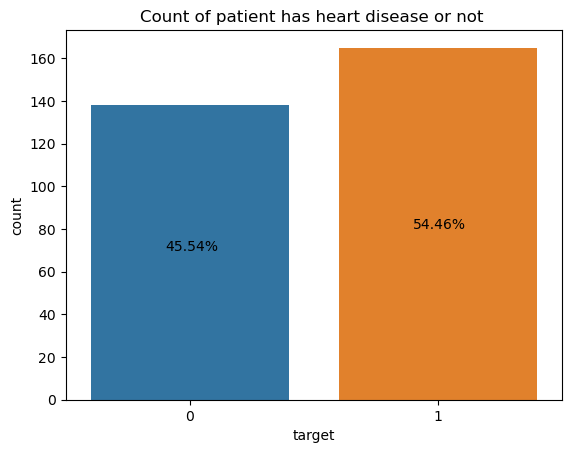

In [29]:
sns.countplot(data=df,x='target')
plt.text(x=-0.1,y=70,s=str(round(df.target.value_counts()[0]/len(df)*100,2))+'%')
plt.text(x=0.9,y=80,s=str(round(df.target.value_counts()[1]/len(df)*100,2))+'%')
plt.title('Count of patient has heart disease or not ')
plt.show()

## Data distribution using histplot and distplot

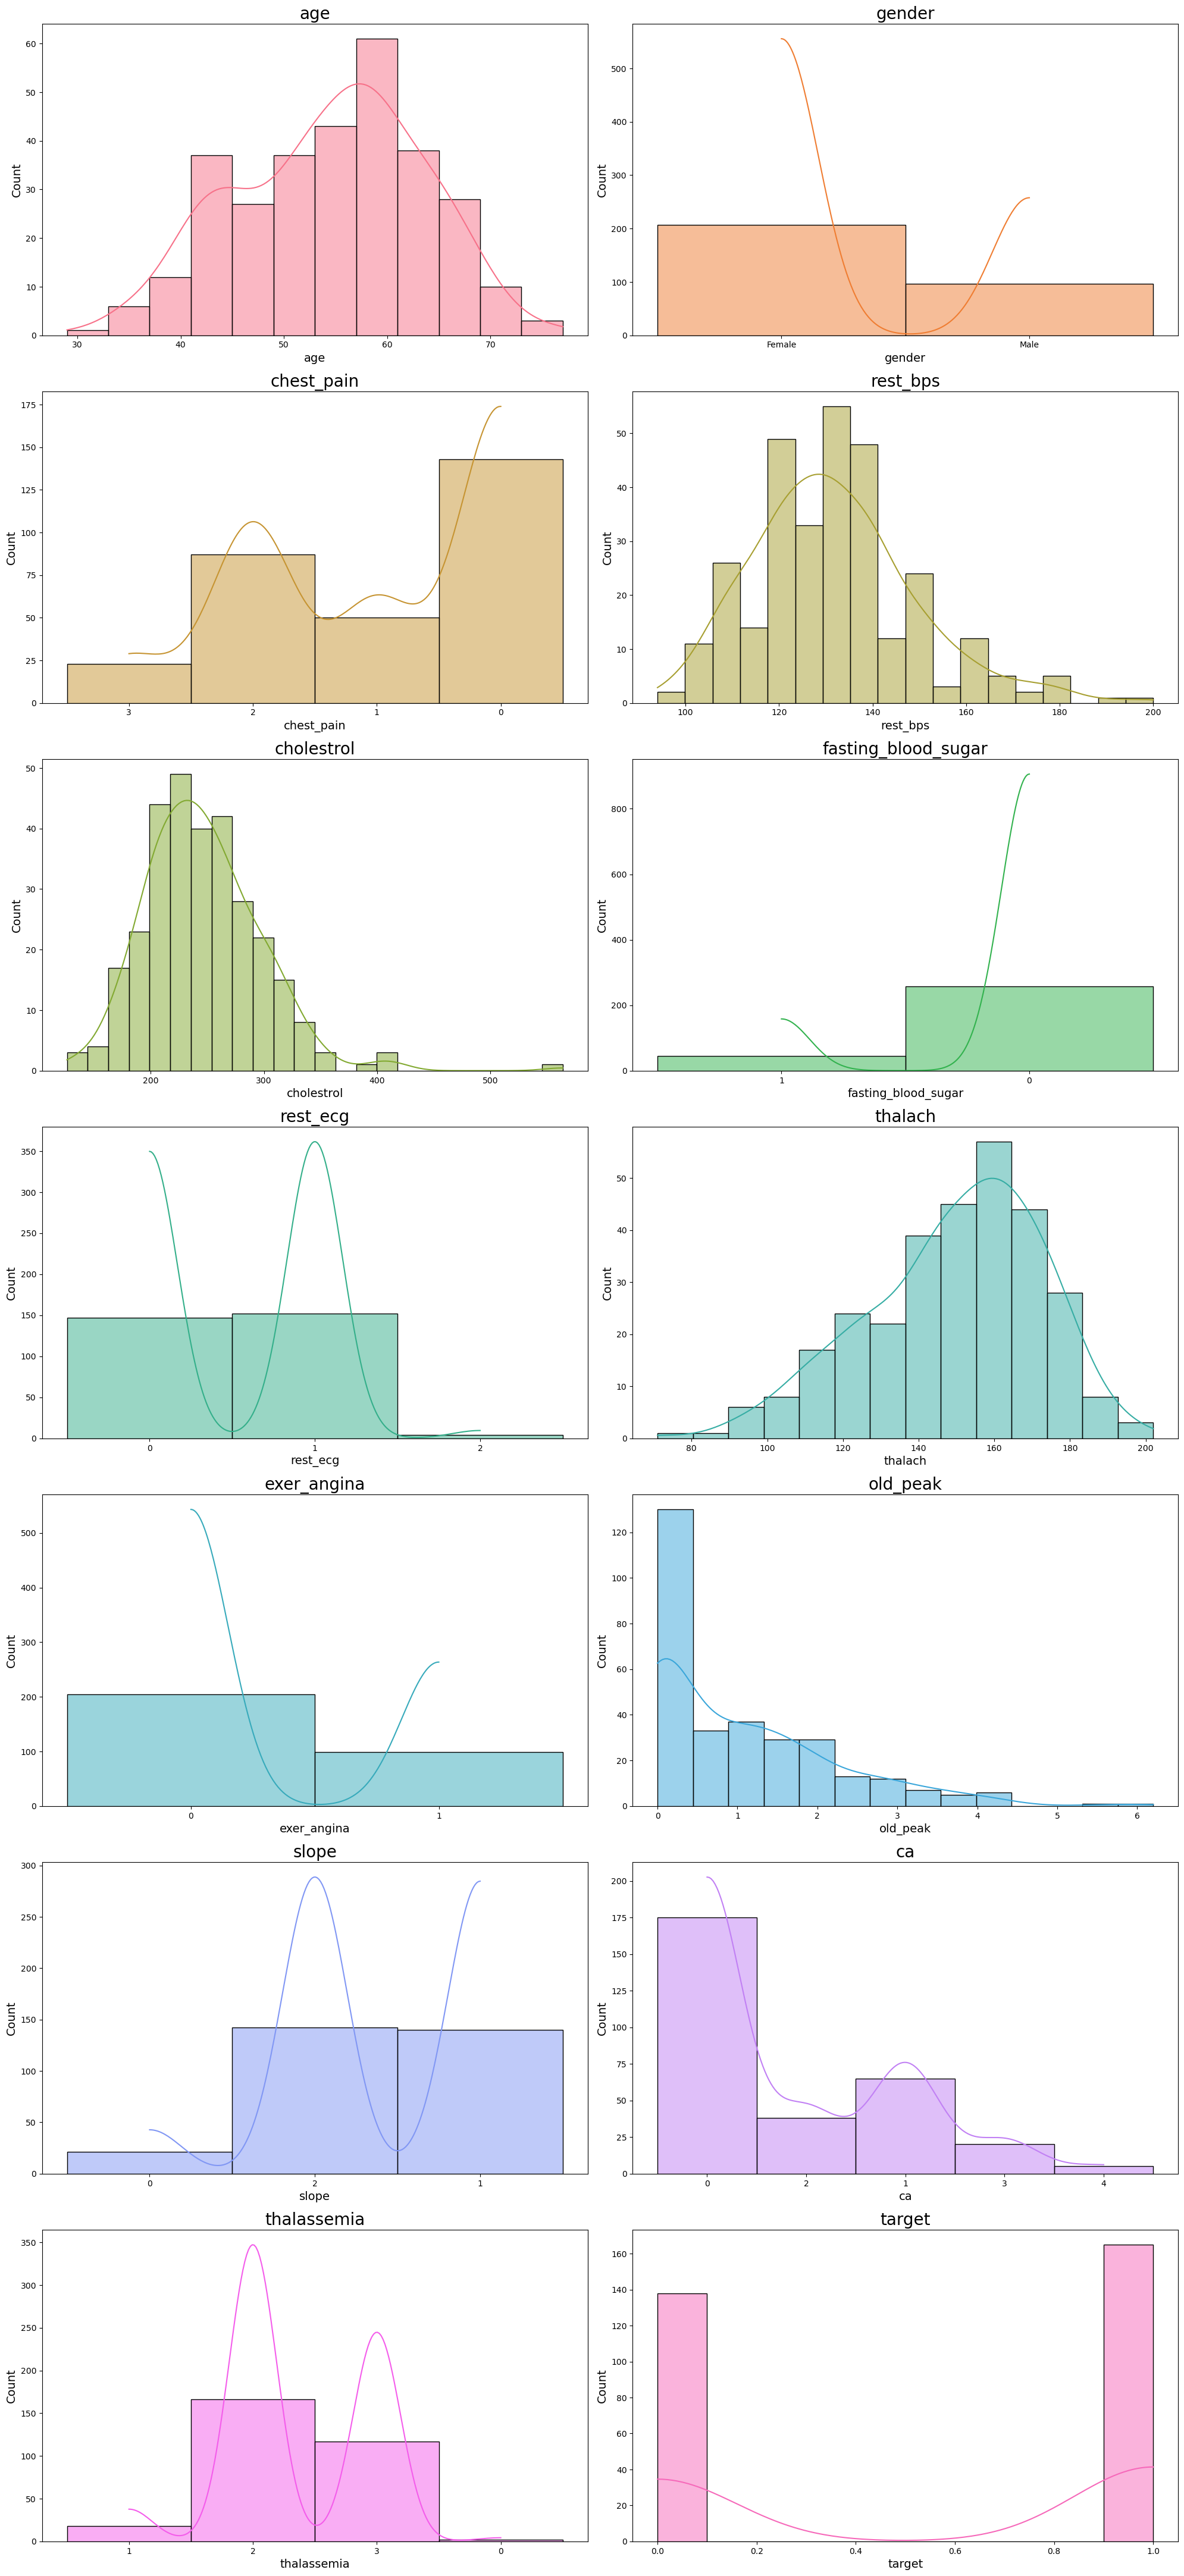

In [32]:
num_columns = df.shape[1]
num_rows = 13
num_cols = (num_columns + num_rows - 1) // num_rows

# Define a list of colors
colors = sns.color_palette('husl', num_columns)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 80))

for i, column in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.histplot(data=df, x=column, kde=True, color=colors[i], line_kws={'color': 'black'}, ax=ax)
    ax.set_title(column, fontsize=20)
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)  
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)


# Remove empty subplots
if num_columns < num_rows * num_cols:
    for j in range(num_columns, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()

## Data is skewed or not ?

In [33]:
df.skew()

C:\Users\dell\AppData\Local\Temp\ipykernel_15588\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                   -0.202463
chest_pain             0.484732
rest_bps               0.713768
cholestrol             1.143401
fasting_blood_sugar    1.986652
rest_ecg               0.162522
thalach               -0.537410
exer_angina            0.742532
old_peak               1.269720
slope                 -0.508316
ca                     1.310422
thalassemia           -0.476722
target                -0.179821
dtype: float64

In [29]:
df = pd.get_dummies(df)

In [30]:
df.sample(10)

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_0,gender_1,chest_pain_0,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_0,fasting_blood_sugar_1,rest_ecg_0,rest_ecg_1,rest_ecg_2,exer_angina_0,exer_angina_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3
233,64,120,246,96,2.2,0,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0
60,71,110,265,130,0.0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
219,48,130,256,150,0.0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
137,62,128,208,140,0.0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
125,34,118,210,192,0.7,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
288,57,110,335,143,3.0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
248,54,192,283,195,0.0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
139,64,128,263,105,0.2,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
174,60,130,206,132,2.4,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1
130,54,160,201,163,0.0,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0


In [31]:
df.shape

(303, 31)